In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(357, 395, 3)


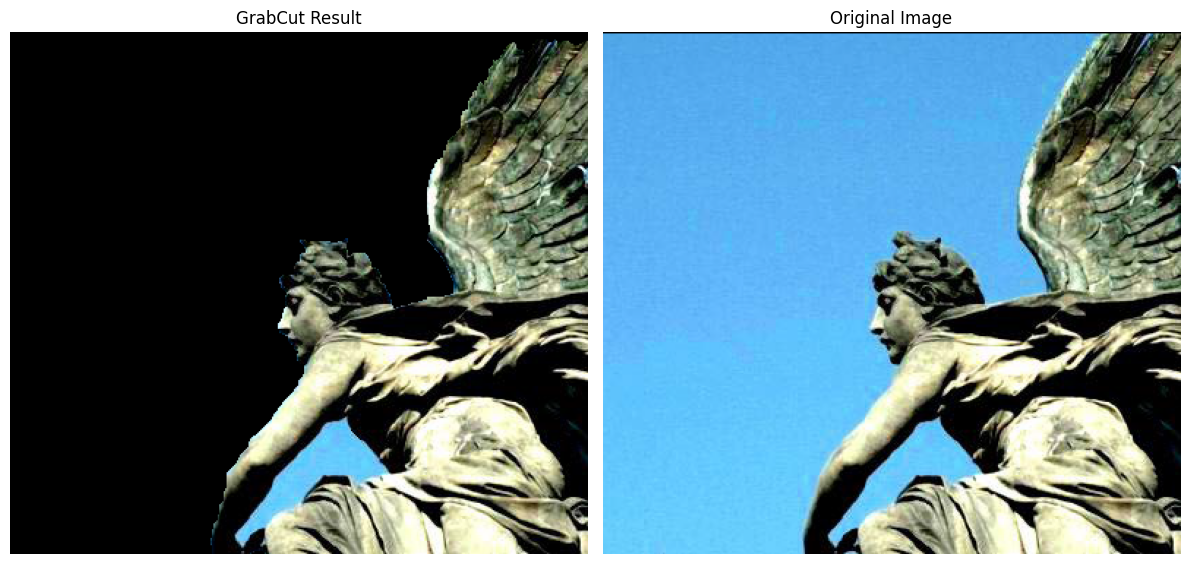

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image
path = '/content/drive/My Drive/images/small-statue.png'
img = cv2.imread(path)

print (img.shape)

# Create an initial mask filled with zeros
mask = np.zeros(img.shape[:2], np.uint8)

# Allocate memory for the background and foreground models (used internally by GrabCut)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the subject (x, y, width, height)
rect = (100, 5, 421, 378)

# Apply GrabCut using the rectangle to initialize the segmentation
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where sure and probable background are set to 0, others to 1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image to extract the foreground
result = img * mask2[:, :, np.newaxis]

# Display the result and original image side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("GrabCut Result")
plt.axis('off')

plt.subplot(1, 2, 2)
original = cv2.imread(path)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()
